# Table of Contents

1. Address PII data
2. Categorize states into regions (loc)
3. Crosstab spending by regions
4. Drop all data for users under 5 max orders
5. Make profiles based on
    a. Age Group   
    b. Income Group   
    c. Product Group   
    d. Family Group   
    e. Hour Group  
6. Make Visualizations for each group
7. Aggregate basis stats for each group
8. Compare groups demographics across regions


# Step 1:

Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# set path variable

path = r'C:\Users\Jenna\Desktop\Data Course\Part4_Instacart_analysis\02_Data'

In [5]:
# set chart path variable

path2 =r'C:\Users\Jenna\Desktop\Data Course\Part4_Instacart_analysis\04_Analysis\Visualizations'

In [3]:
# import the datframe

df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'customer_merged.pkl' ))

# Step 2:

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# check the dataframe for data that may be personally identifiable information

pd.options.display.max_columns = None

df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order,spending_flag,order_freq,freq_flag,First Name,Last Name,Gender,STATE,Age,date_joined,Number_of_Dependants,fam_status,income,True,age,n_dependants
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid range product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly Busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly Busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid range product,Least Busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid range product,Least Busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3


## Step 2: The first and last name columns do not add anything to the analysis and are PII so they can be dropped

In [5]:
# drop first and last name columns to protect customer privacy
#(also on the age and dependant columns are not properly replaced so I will drop those as well )

df.drop(columns = ['First Name', 'Last Name', 'age', 'n_dependants'])

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order,spending_flag,order_freq,freq_flag,Gender,STATE,Age,date_joined,Number_of_Dependants,fam_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.000000,Mid range product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.000000,Mid range product,Regularly Busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.000000,Mid range product,Regularly Busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.000000,Mid range product,Least Busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.000000,Mid range product,Least Busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.703125,Mid range product,Least Busy,Slowest days,Fewest Orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.101562,Mid range product,Regularly Busy,Regularly Busy,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.101562,Mid range product,Regularly Busy,Busiest days,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.101562,Mid range product,Regularly Busy,Regularly Busy,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


# Step 3:

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)



In [6]:
# first make lists for the states in each region

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


## Step 3A:  Use the loc function to create a new column that will display the region for each order

In [7]:
# northeast

df.loc[df['STATE'].isin(northeast), 'Region'] = 'Northeast'

In [8]:
# midwest

df.loc[df['STATE'].isin(midwest), 'Region'] = "Midwest"

In [9]:
# south

df.loc[df['STATE'].isin(south), 'Region'] = 'South'

In [10]:
# west

df.loc[df['STATE'].isin(west), 'Region'] = 'West'

In [11]:
# check the values of the new column

df['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

## Step 3B. Compare spending habits by region

In [12]:
# make a crosstab of spending flags by region

spending_byregion = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [13]:
# check output

spending_byregion

spending_flag,High Spender,Low Spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [14]:
# copy to clipboard to paste in excel

spending_byregion.to_clipboard()

# Step 4:

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
# create a subset df with only customer with max order values above 5

df_2 = df[df['max_order'] >= 5]

In [45]:
# check new length 

len(df_2)

30964564

In [16]:
#check that the length of the new database lines up how it should

len(df_2) + len(df[df['max_order'] < 5])

32404859

In [17]:
# the lengths match, should be good to use

len(df)

32404859

In [18]:
# export the new sample with out low spending customers

df_2.to_pickle(os.path.join(path, 'Prepared_Data', 'final_lowspend_excluded.pkl'))

# Step 5:

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on (A)age, (B)income, certain goods in the (C)“department_id” column, and number of (D)dependents.

You might also use the (E) “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Step 5A. Make a profiling variable based on age

In [19]:
# first I will check the basic stats for the ages columns to get an idea for the categories

df_2['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

#### Step 5A. Based on this data I will have 4 categories: 
 Young Adult (18-33)  
 Adult (34-49)  
 Middle Aged (50-64)   
 Senior (65+)
 
 I will make these flags and store them in an 'Age Group' column

In [63]:
# young adult 

df_2.loc[df_2['Age'] <= 33 , 'Age Group'] = 'Young Adult'

In [21]:
# adult

df_2.loc[(df_2['Age'] >33) & (df_2['Age'] <= 49) , 'Age Group'] = 'Adult'

In [22]:
# middle age

df_2.loc[(df_2['Age'] > 49) & (df_2['Age'] <= 64) , 'Age Group'] = 'Middle Aged'

In [23]:
# senior

df_2.loc[df_2['Age'] >= 65 , 'Age Group'] = 'Senior'

In [24]:
# check the value counts of this column

df_2['Age Group'].value_counts(dropna = False)

Senior         8195544
Adult          7790824
Young Adult    7757465
Middle Aged    7220731
Name: Age Group, dtype: int64

## Step 5B. Make a profile based on Income

In [25]:
# again I will start by looking at the stats for income

df_2['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

### Step 5B. For this income I will make three categories

lower income (under 60,000)   
middle income (60,000 - 100,000)  
high income (over 100,000)  

In [62]:
# lower income 

df_2.loc[df_2['income'] < 60000 , 'Income Group'] = 'Lower Income'

In [27]:
# middle income 

df_2.loc[(df_2['income'] >= 60000) & (df_2['income'] <= 100000) , 'Income Group'] = 'Middle Income'

In [28]:
# high income 

df_2.loc[df_2['income'] > 100000 , 'Income Group'] = 'High Income'

In [29]:
# check the flag column

df_2['Income Group'].value_counts(dropna = False)

High Income      14207028
Middle Income    10954786
Lower Income      5802750
Name: Income Group, dtype: int64

## Step 5C. Make a profiling variable based on department ID

In [30]:
# first I will import and view the departmens IDs list

deps = pd.read_csv(os.path.join(path, 'Prepared_Data', 'deparments_wrangled.csv') , index_col = 0)

In [31]:
# viewing deps 
deps

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


### 5C. for this I will try to establish food items, specialized, and everyday items
This will be based on lists where the department ids are grouped into categories



In [3]:
# first I will make lists with the product categorues

food = [1,3,4,7,9,12,13,14,15,16,19,20]
specialized = [10, 5, 8,18,6,7]
everyday_items = [11,17]
other = [2,21]

In [56]:
# food

df_2.loc[df_2['department_id'].isin(food)  , 'Product Group'] = 'Food Product'

In [57]:
# specialized product

df_2.loc[df_2['department_id'].isin(specialized)  , 'Product Group'] = 'Specialized Product'

In [58]:
# Every Day Product

df_2.loc[df_2['department_id'].isin(everyday_items)  , 'Product Group'] = 'Every Day Product'

In [59]:
# Other

df_2.loc[df_2['department_id'].isin(other)  , 'Product Group'] = 'Other'

In [60]:
# Check values

df_2['Product Group'].value_counts(dropna = False)

Food Product           26231800
Specialized Product     3509422
Every Day Product       1124163
Other                     99179
Name: Product Group, dtype: int64

## Step 5D. Make a profile based on # of dependants

In [33]:
# first establish the counts on the number of dependents

df_2['Number_of_Dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: Number_of_Dependants, dtype: int64

In [34]:
# also check the fam status columns

df_2['fam_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

### 5D. For this I will establish several family groupings

After some trial and error I found that the best categories for this section would be:

big family = 3 or more dependants and married or living with parents/sibilings   
family = between 1 and 3 dependants and married or living with parents/siblings    
single adult = no dependants 

There did not appear to be any married couples without dependants or single parents in this database

In [61]:
# big family

df_2.loc[(df_2['Number_of_Dependants'] == 3) & (df_2['fam_status'].isin(['married', 'living with parents and siblings'])) , 'Family Group'] = 'Big Family'

In [36]:
# family

df_2.loc[(df_2['Number_of_Dependants'] > 0) & (df_2['Number_of_Dependants'] < 3) & (df_2['fam_status'].isin(['married', 'living with parents and siblings'])) , 'Family Group'] = 'Family'

In [37]:
# Single Adult

df_2.loc[(df_2['Number_of_Dependants'] == 0) & (df_2['fam_status'].isin(['single', 'divorced/widowed']))  , 'Family Group'] = 'Single Adult'

In [38]:
df_2['Family Group'].value_counts(dropna = False)

Family          15452367
Big Family       7772516
Single Adult     7739681
Name: Family Group, dtype: int64

## Step 5D. Make a profile based on hours of day

In [68]:
# first check the counts

df_2['order_hour_of_day'].value_counts()

10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: order_hour_of_day, dtype: int64

### 5E. For this I will establish four categories:

morning orders (5am - 11am)   
day orders (12pm-5pm)  
night orders (6pm-10pm)  
midnight orders (11pm-4am)  

In [93]:
# I will establish lists to check the ranges of hours

morning =[*range(5,12)]
day = [*range(12, 18)]
night= [*range(18, 23)]
midnight = [23,0,1,2,3,4]

In [202]:
# morning_orders 

df_2.loc[df_2['order_hour_of_day'].isin(morning)  , 'Hour Group'] = 'Morning Orders'

In [203]:
# day_orders 

df_2.loc[df_2['order_hour_of_day'].isin(day)  , 'Hour Group'] = 'Day Orders'

In [204]:
# night_orders 

df_2.loc[df_2['order_hour_of_day'].isin(night)  , 'Hour Group'] = 'Night Orders'

In [205]:
# midnight_orders 

df_2.loc[df_2['order_hour_of_day'].isin(midnight)  , 'Hour Group'] = 'Midnight Orders'

In [100]:
# Check value 

df_2['Hour Group'].value_counts(dropna= False)

Day_orders         14534966
Morning_orders     10515989
Night_orders        5046142
Midnight_orders      867467
Name: Hour Group, dtype: int64

In [235]:
# export the final dataframe

df_2.to_pickle(os.path.join(path, 'Prepared_Data', 'final_e10_flags.pkl'))

# Step 6 Create an appropriate visualization to show the distribution of profiles.

a. Age Group   
b. Income Group   
c. Product Group   
d. Family Group   
e. Hour Group  

## Step 6A Graph showing distribution of Age Group

In [37]:
# I will make some colors to be used for the plots

clr1 = [0.2, 0.8, 0.2, 0.6]
clr2 = [0.4, 0.9, 0.6, 0.6]
clr3 = [0.6, 0.9, 0.9, 0.6]
clr4 = [0.9, 0.9, 0.9, 0.6]

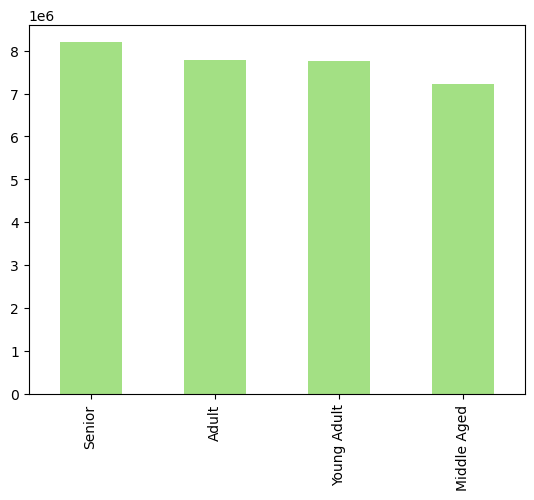

In [169]:
Age_bar = df_2['Age Group'].value_counts().plot.bar(color = [clr1] )

In [210]:
# export

Age_bar.figure.savefig(os.path.join(path2, 'age_group_distribution.png'))

## 6B Graph showing distribution of Income Group

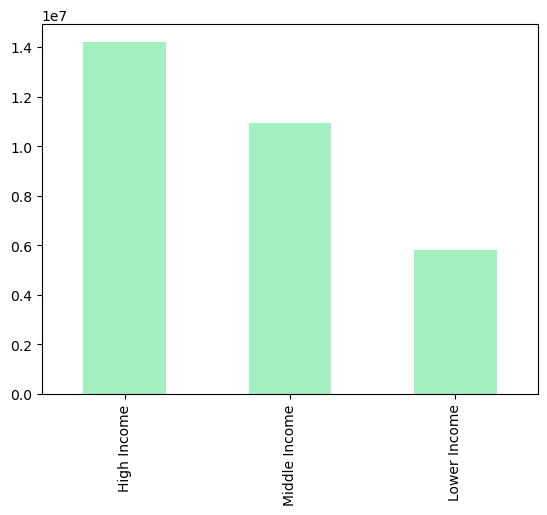

In [179]:
Income_bar = df_2['Income Group'].value_counts().plot.bar(color = [clr2] )

In [211]:
# export

Income_bar.figure.savefig(os.path.join(path2, 'income_group_distribution.png'))

## 6C Graph showing distribution of Product Group

In [196]:
proportions = df_2['Product Group'].value_counts()

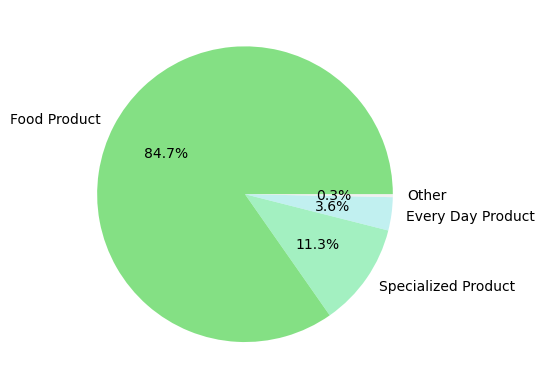

In [223]:
Product_pie = plt.pie(proportions, labels = proportions.index, autopct='%1.1f%%', colors = [clr1, clr2, clr3, clr4])

#export

plt.savefig(os.path.join(path2, 'product_group_distribution.png'))

## 6D Graph showing distribution of Family Group

In [2]:
Family_bar = df_2['Family Group'].value_counts().plot.bar(color = [clr1] )

NameError: name 'df' is not defined

In [218]:
# export

Family_bar.figure.savefig(os.path.join(path2, 'family_group_distribution.png'))

## 6E Graph showing distribution of Hour of Day Group

In [207]:
proportions2 = df_2['Hour Group'].value_counts()

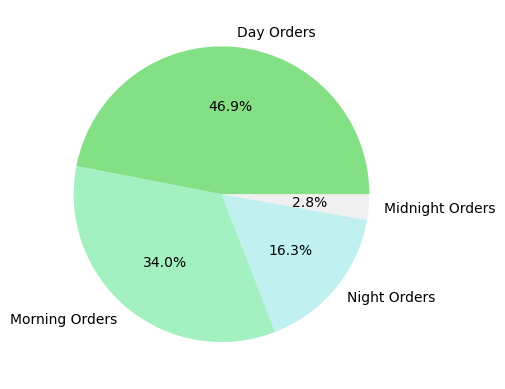

In [224]:
Hour_pie = plt.pie(proportions2, labels = proportions2.index, autopct='%1.1f%%', colors = [clr1, clr2, clr3, clr4])

#export

plt.savefig(os.path.join(path2, 'hod_group_distribution.png'))

In [6]:
# import the  final dataframe for the rest of the exercise NOTE it was accidentally named df at import and due to memory issues and extremely slow import
#I am unable to change the name and reimport, in the future I will make sure to use consistent naming especially within a single notebook

df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'final_e10_flags.pkl' ))

# Step 7.  Aggregate the max, mean, and min variables on a customer-profile level for usage frequency( order_freq, max_order)  and expenditure(average_order).

a. Age Group   
b. Income Group   
c. Product Group   
d. Family Group   
e. Hour Group  

In [19]:
# the average order column was made before the artificially high prices were excluded, so I will make a list to use

average_order = [df.loc[df['average_order']<=100]]

In [27]:
# first I will establish the aggregations I will be using max, mean, min for order frequency, max_order, and average_order

aggregations = {
    'days_since_prior_order': ['mean', 'max', 'min'],
    'max_order': ['mean', 'max', 'min'],
    'average_order': ['mean', 'median', 'min'],
}

#the max value for average order is excluded as the average_order column was made before the artificially high prices were excluded

In [28]:
# age group aggregation

df.groupby('Age Group').agg(aggregations).astype(int)

days_since_prior_order         max_order         average_order  \
                              mean max min      mean max min          mean   
Age Group                                                                    
Adult                           10  30   0        34  99   5            12   
Middle Aged                     10  30   0        34  99   5            11   
Senior                          10  30   0        34  99   5            11   
Young Adult                     10  30   0        34  99   5            12   

                        
            median min  
Age Group               
Adult            7   1  
Middle Aged      7   1  
Senior           7   1  
Young Adult      7   1

In [30]:
# income group aggregation

df.groupby('Income Group').agg(aggregations).astype(int)

days_since_prior_order         max_order         average_order  \
                                mean max min      mean max min          mean   
Income Group                                                                   
High Income                       10  30   0        34  99   5            16   
Lower Income                      11  30   0        33  99   5             7   
Middle Income                     10  30   0        34  99   5             8   

                          
              median min  
Income Group              
High Income        7   7  
Lower Income       6   1  
Middle Income      7   7

In [31]:
# Product group aggregation

df.groupby('Product Group').agg(aggregations).astype(int)

days_since_prior_order         max_order          \
                                      mean max min      mean max min   
Product Group                                                          
Every Day Product                       11  30   0        31  99   5   
Food Product                            10  30   0        34  99   5   
Other                                   10  30   0        31  99   5   
Specialized Product                     10  30   0        34  99   5   

                    average_order             
                             mean median min  
Product Group                                 
Every Day Product              14      7   1  
Food Product                   11      7   1  
Other                          12      7   1  
Specialized Product            12      7   1

In [32]:
# Family group aggregation

df.groupby('Family Group').agg(aggregations).astype(int)

days_since_prior_order         max_order         average_order  \
                               mean max min      mean max min          mean   
Family Group                                                                  
Big Family                       10  30   0        34  99   5            11   
Family                           10  30   0        34  99   5            11   
Single Adult                     10  30   0        34  99   5            12   

                         
             median min  
Family Group             
Big Family        7   1  
Family            7   1  
Single Adult      7   1

In [33]:
# Hour group aggregation

df.groupby('Hour Group').agg(aggregations).astype(int)

days_since_prior_order         max_order          \
                                  mean max min      mean max min   
Hour Group                                                         
Day Orders                          10  30   0        33  99   5   
Midnight Orders                     11  30   0        32  99   5   
Morning Orders                      10  30   0        36  99   5   
Night Orders                        10  30   0        33  99   5   

                average_order             
                         mean median min  
Hour Group                                
Day Orders                 12      7   1  
Midnight Orders            11      7   1  
Morning Orders             11      7   1  
Night Orders               11      7   1

# Step  8/9.  Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important. Produce suitable charts to illustrate your results and export them in your project folder.



a. Age Group   
b. Income Group   
c. Product Group   
d. Family Group   
e. Hour Group  

## 8A. Use a crosstab to compare age by region

In [35]:
# age crosstab

age_byregion = pd.crosstab(df['Region'], df['Age Group'], dropna = False)

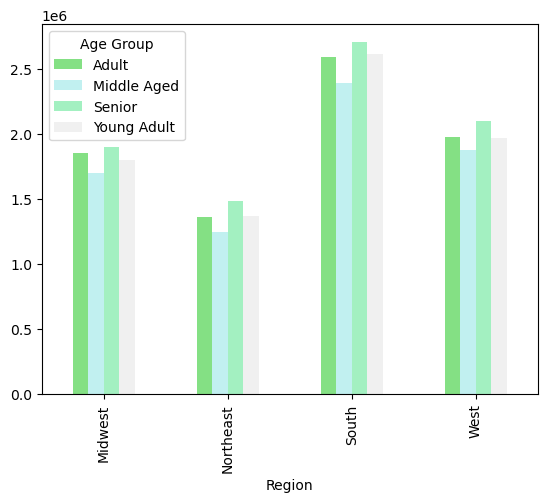

In [50]:
# bar graph for age by region
bar_age_byregion = age_byregion.plot.bar(color = [clr1, clr3, clr2, clr4] )

In [51]:
# export

bar_age_byregion.figure.savefig(os.path.join(path2, 'age_byregion_bar.png'))

## 8B. Use a crosstab to compare Income by region

In [48]:
# Income crosstab

income_byregion = pd.crosstab(df['Region'], df['Income Group'], dropna = False)

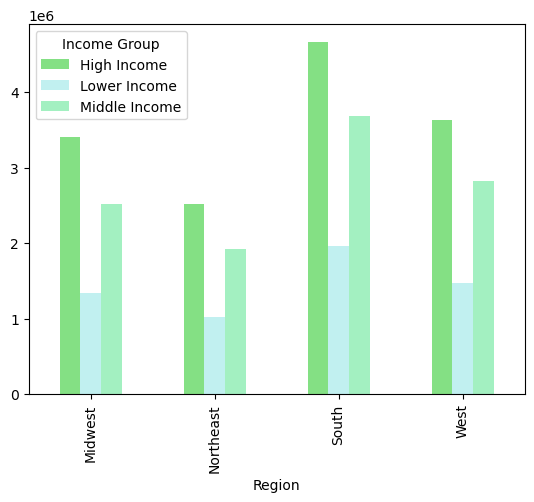

In [53]:
# chart income by region

bar_income_byregion = income_byregion.plot.bar(color = [clr1, clr3, clr2])

In [54]:
# export

bar_income_byregion.figure.savefig(os.path.join(path2, 'income_byregion_bar.png'))

## 8C. Use a crosstab to compare product by region

In [55]:
# Product crosstab

product_byregion = pd.crosstab(df['Region'], df['Product Group'], dropna = False)

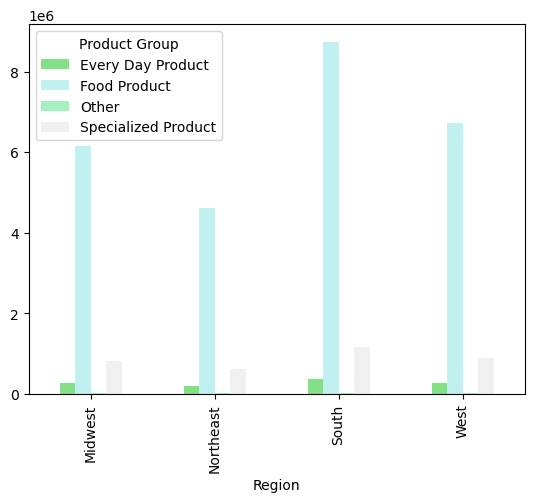

In [58]:
# chart product by region

bar_product_byregion = product_byregion.plot.bar(color = [clr1, clr3, clr2, clr4])

In [59]:
# export

bar_product_byregion.figure.savefig(os.path.join(path2, 'product_byregion_bar.png'))

## 8D. Use a crosstab to compare family by region

In [61]:
# Family crosstab

family_byregion = pd.crosstab(df['Region'], df['Family Group'], dropna = False)

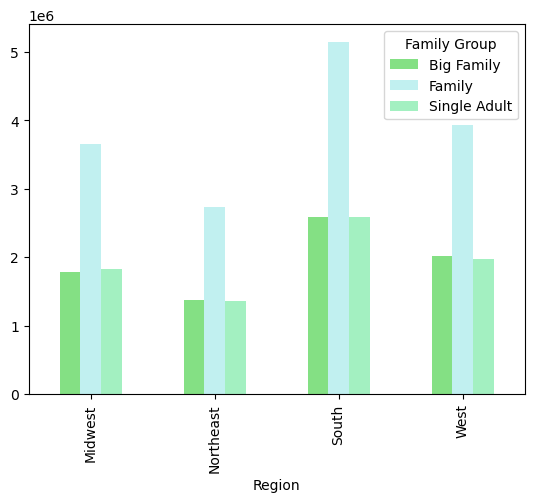

In [63]:
# chart family by region

bar_family_byregion = family_byregion.plot.bar(color = [clr1, clr3, clr2])

In [64]:
# export

bar_family_byregion.figure.savefig(os.path.join(path2, 'family_byregion_bar.png'))

## 8E. Use a crosstab to compare hour of day by region

In [66]:
# hourofday crosstab

hourofday_byregion = pd.crosstab(df['Region'], df['Hour Group'], dropna = False)

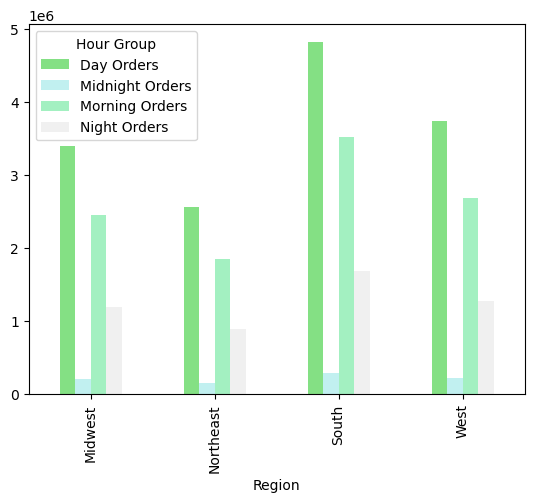

In [68]:
# chart hour of day by region

bar_hod_byregion = hourofday_byregion.plot.bar(color = [clr1, clr3, clr2, clr4])

In [69]:
# export

bar_hod_byregion.figure.savefig(os.path.join(path2, 'hod_byregion_bar.png'))

## 10. Tidy up your script, export your final data set (exported above), and save your notebook.